In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris_data = load_iris()

X_fts = iris_data.data
y_trgt = iris_data.target

In [3]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_fts, y_trgt, cv=10, scoring='accuracy')
print(scores, '\n', scores.mean())

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ] 
 0.966666666667


In [4]:
# Searching for the optimal k in KNN
k_scores = []
k_range = range(1,31)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_fts, y_trgt, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


**Reminder:**
- We are using mean because we are looking in a loop, for the best k.
- So, we go from 1 through 31 and do a cross-validation of 10, which basically means 
that we are using 10 different testing sets

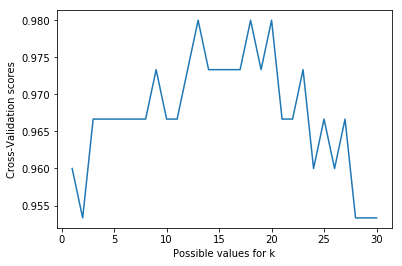

In [5]:
# Plot the values for a visual intepration
plt.plot(k_range, k_scores)
plt.xlabel('Possible values for k')
plt.ylabel('Cross-Validation scores')


**Reminder:**
- Best score for k in KNN are 13, 18, and 20


**NOTE**
- The code that's above is a great way of implementing the best possible k in KNN through cross-validation
- However, there's an even more automated way of creating this: Using "GridSearchCV"
---

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
k_range = range(1,31)

In [8]:
# Create a parameter grid: map the parameter to the values that should be searches
param_grid = dict(n_neighbors=k_range)
param_grid

{'n_neighbors': range(1, 31)}

In [9]:
# Creating the grid object
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')


**Reminder:**
- This code is similar to the previous method we were doing
- Here, we pass the knn, cv and scoring parameters like before
- The difference is that we pass a param_grid which has a a key 'n_neighbors' with a list value from 1 through 31.

In [10]:
# Fit the grid with data
grid.fit(X_fts, y_trgt)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [11]:
grid.cv_results_

{'mean_fit_time': array([ 0.0005198 ,  0.00092301,  0.00031438,  0.00031888,  0.0003093 ,
         0.00030484,  0.00035217,  0.00032625,  0.00030947,  0.00029113,
         0.0003788 ,  0.00035601,  0.00032763,  0.00028787,  0.00029018,
         0.00029209,  0.00031972,  0.00033484,  0.00029933,  0.00028961,
         0.00029087,  0.00029438,  0.00036213,  0.00030017,  0.00034621,
         0.0003305 ,  0.00031202,  0.0002939 ,  0.00033178,  0.00032659]),
 'mean_score_time': array([ 0.00104303,  0.00170875,  0.00051632,  0.00058546,  0.00053992,
         0.00054307,  0.00057933,  0.00054827,  0.00054209,  0.00052724,
         0.00060067,  0.00058477,  0.00060627,  0.00052845,  0.00052235,
         0.00052209,  0.0005775 ,  0.00060287,  0.00053947,  0.00052853,
         0.00059967,  0.00055604,  0.00060925,  0.00060949,  0.00061226,
         0.00059631,  0.00057745,  0.00055997,  0.00061491,  0.00058992]),
 'mean_test_score': array([ 0.96      ,  0.95333333,  0.96666667,  0.96666667,  0.96

In [12]:
# Understanding an individula tuple, which is what is returned with cv_results_
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

{'n_neighbors': 1}
0.96


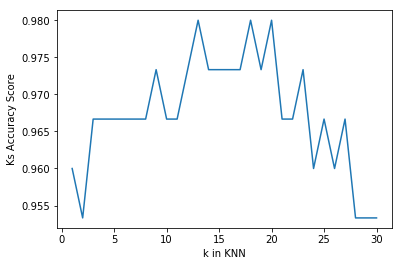

In [13]:
# Plotting the mean score
grid_mean_test_score = [mean_score for mean_score in grid.cv_results_['mean_test_score']]

plt.plot(k_range, grid_mean_test_score)
plt.xlabel('k in KNN')
plt.ylabel('Ks Accuracy Score')

In [14]:
print(grid.best_score_, grid.best_params_, grid.best_estimator_)

0.98 {'n_neighbors': 13} KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


## Searching multiple parameters simultaneously

In [15]:
# We will loop through multiple parameters: k for knn and weight_options
k_range = range(1,31)
weight_options = ['uniform', 'distance']


**Notes:**
- The distance parameter simply means that the closer neighbors are weighted more heavily than  the neighbors that are further away
- This is unlike the uniform parameter where they are all weighted equally

In [16]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)

In [17]:
# Creating the class with the current data
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_fts, y_trgt)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [18]:
grid.cv_results_

{'mean_fit_time': array([ 0.00063748,  0.00085685,  0.00034542,  0.00035596,  0.00029387,
         0.00029058,  0.00029051,  0.00030808,  0.000334  ,  0.00030642,
         0.00028992,  0.00029407,  0.00033758,  0.00035045,  0.0003401 ,
         0.00029378,  0.00033326,  0.00032303,  0.00032482,  0.00030568,
         0.00029616,  0.00030596,  0.0002944 ,  0.00030677,  0.00029616,
         0.00029504,  0.00029247,  0.00029812,  0.00029442,  0.00029991,
         0.00031655,  0.00030425,  0.0003438 ,  0.00029812,  0.00029547,
         0.00031977,  0.00033267,  0.00031452,  0.00029576,  0.00029387,
         0.00037482,  0.00033116,  0.00029731,  0.00031333,  0.00031376,
         0.00034466,  0.00029774,  0.00029874,  0.00029712,  0.00035784,
         0.00029151,  0.00030389,  0.00033991,  0.00032215,  0.00030081,
         0.00029714,  0.0003196 ,  0.00030062,  0.00030289,  0.00034659]),
 'mean_score_time': array([ 0.00113342,  0.00143549,  0.00058568,  0.00059888,  0.00049303,
         0.00

In [19]:
# Examine the best model
print(grid.best_score_, grid.best_params_)

0.98 {'n_neighbors': 13, 'weights': 'uniform'}


In [20]:
# Now we can train our data with the parameters for the given model
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X_fts, y_trgt)
knn_pred = knn.predict([[3, 5, 4, 2]])

# A shortcut to the code above can be done with grid object
grid_pred = grid.predict([[3, 5, 4, 2]])

print(knn_pred, grid_pred)


[1] [1]


- They produce the same results

## RandomizedSearchCV 
- Because the computation can be tedious and cost efficient, this method does the same as GridSearchCV but you can 
control a lot of the computation to create a randomized computation that won't require as much as computation as GridSearchCV

In [21]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = dict(n_neighbors=k_range, weights=weight_options)

** NOTE: ** According the Data School, we must remember that for continous parameters, we must specify a continous distribution and NOT a list of values 

In [22]:
rand = RandomizedSearchCV(knn, param_dist, cv=10, n_iter=10, random_state=5)
rand.fit(X_fts, y_trgt)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [23]:
rand.cv_results_


{'mean_fit_time': array([ 0.0004801 ,  0.00046637,  0.0005686 ,  0.00032468,  0.00029895,
         0.00030155,  0.00032122,  0.00029674,  0.00029688,  0.0003113 ]),
 'mean_score_time': array([ 0.00108645,  0.00113041,  0.00084431,  0.00059681,  0.00057991,
         0.0005708 ,  0.00060432,  0.0005281 ,  0.0005496 ,  0.00056779]),
 'mean_test_score': array([ 0.97333333,  0.96666667,  0.98      ,  0.96666667,  0.95333333,
         0.97333333,  0.96666667,  0.97333333,  0.97333333,  0.97333333]),
 'mean_train_score': array([ 1.        ,  0.97111111,  0.97777778,  0.96148148,  0.95925926,
         1.        ,  1.        ,  0.97925926,  1.        ,  0.97925926]),
 'param_n_neighbors': masked_array(data = [16 22 18 27 29 10 22 14 12 15],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'param_weights': masked_array(data = ['distance' 'uniform' 'uniform' 'uniform' 'uniform' 'distance' 'distance'
  'uniform' 'distance' 'uniform'],
  

**Notes:**
- We are only iterating through the loop 10 times at random intervals

In [24]:
# Printing the best result
print(rand.best_score_, rand.best_params_)

0.98 {'weights': 'uniform', 'n_neighbors': 18}
